In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

## **Autocorrelation and Partial Autocorrelation**

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting.

**Correlation and Autocorrelation**

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot. 

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot acf() function from the Statsmodels library.

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
                parse_dates=True, squeeze=True)

series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [7]:
series.shape

(3650,)

Text(0.5, 1.0, 'ACF plot on the Minimum Daily Temperatures dataset.')

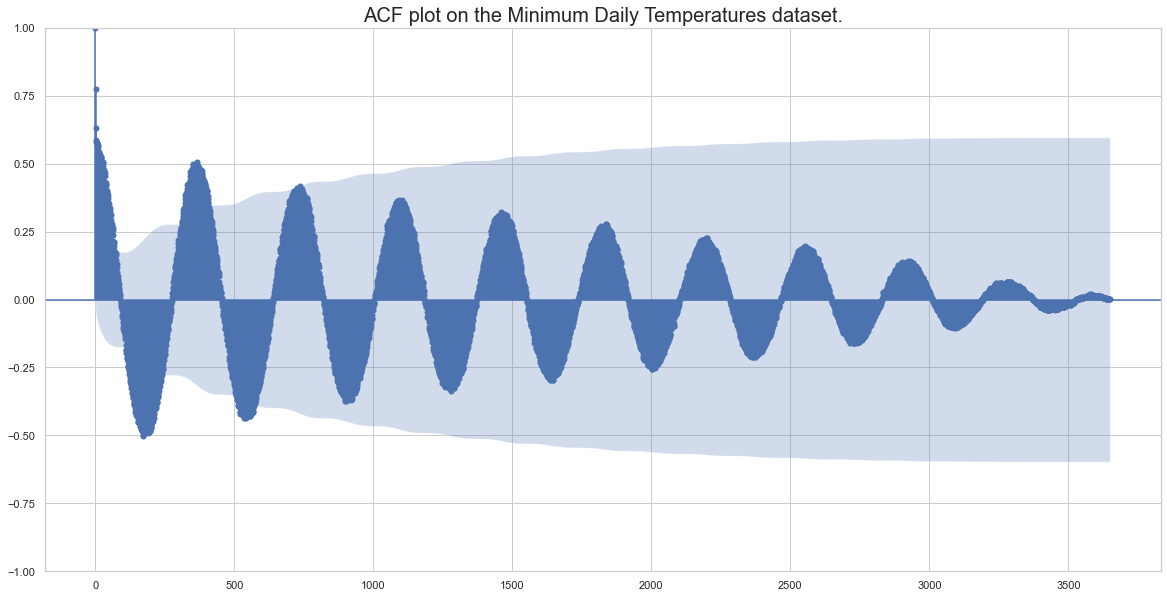

In [16]:
fig,ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
plot_acf(series,ax=ax,lags=3649) 
# plot_acf(series,ax=ax) # Default lags = 35
ax.set_title("ACF plot on the Minimum Daily Temperatures dataset.",fontdict={"fontsize":20})

Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical  fluke.

Text(0.5, 1.0, 'ACF plot with lags=50 on the Minimum Daily Temperatures dataset.')

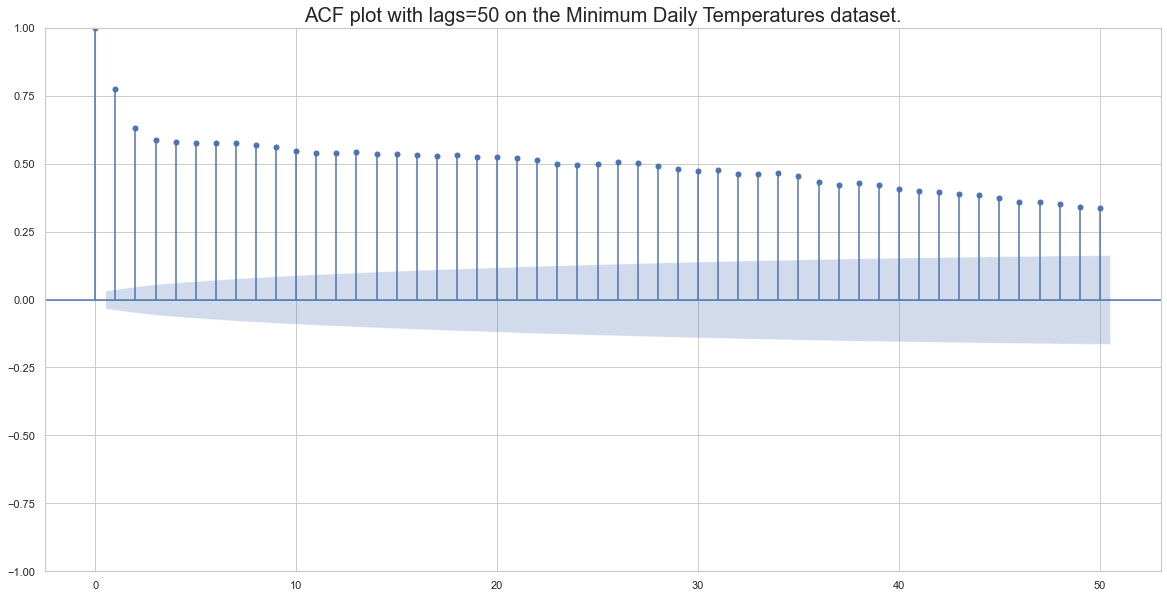

In [18]:
# Zooming in using 50 lags
fig,ax = plt.subplots(figsize=(20,10))
plot_acf(series,ax=ax,lags=50)
ax.set_title("ACF plot with lags=50 on the Minimum Daily Temperatures dataset.",fontdict={"fontsize":20})

**Partial Autocorrelation Function**

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

- Page 81, Section 4.5.6 Partial Autocorrelations, Introductory Time Series with R.

**The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.**

Text(0.5, 1.0, 'PACF plot with lags=50 on the Minimum Daily Temperatures dataset.')

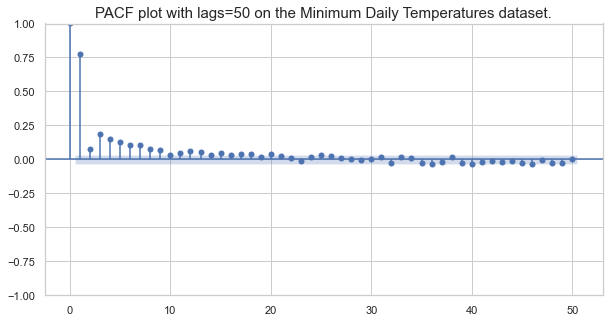

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

# Zooming in using 50 lags
fig,ax = plt.subplots(figsize=(10,5))
plot_pacf(series,ax=ax,lags=50)
ax.set_title("PACF plot with lags=50 on the Minimum Daily Temperatures dataset.",fontdict={"fontsize":15})

**Intuition for ACF and PACF Plots**

- *Autoregression Intuition:* Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened. We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

- *Moving Average Intuition:* Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated. For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.